In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [41]:
# import a file with extension .eig
data = np.loadtxt('JJ_array_membranes_fast_HFSSDesign1.eig')
data = data[:,0:2]
data[:,0] = data[:,0] + 1
data

array([[ 1.        , 16.52734492],
       [ 2.        , 17.48649004],
       [ 3.        , 17.69477379],
       [ 4.        , 17.77441339],
       [ 5.        , 17.8135063 ]])

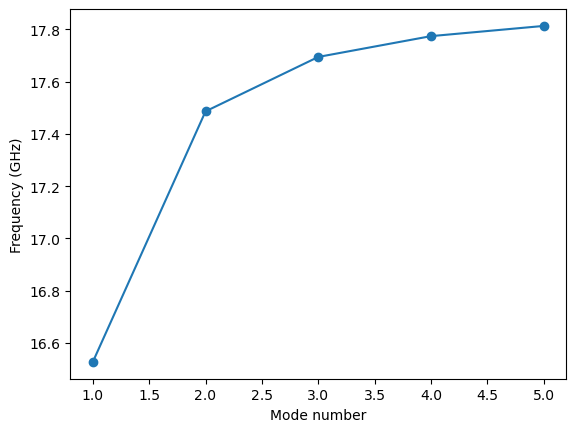

In [42]:
# plot the data
plt.plot(data[:,0], data[:,1], 'o-')
plt.xlabel('Mode number')
plt.ylabel('Frequency (GHz)')
plt.show()

In [43]:
plasma_frequency = 17.9e9 #Hz
Elj = 40e9 #Hz

h = 6.62607015e-34
e = 1.602e-19
phi_0 = h/2/e

junction_inductance = (phi_0/2/np.pi)**2/(Elj*h)
junction_capacitance = 1/(2*np.pi*plasma_frequency)**2/junction_inductance

# 1/(np.sqrt(junction_capacitance*junction_inductance))/2/np.pi

In [44]:
junction_capacitance

1.93411776850627e-14

In [45]:
N = 76
Cj = junction_capacitance
f0 = plasma_frequency

def func(x, c0):
    return f0*np.sqrt((1-np.cos(np.pi*x/N))/(c0/2/Cj + 1-np.cos(np.pi*x/N)))

In [46]:
# fitting data with func
popt, pcov = curve_fit(func, data[:,0], data[:,1])

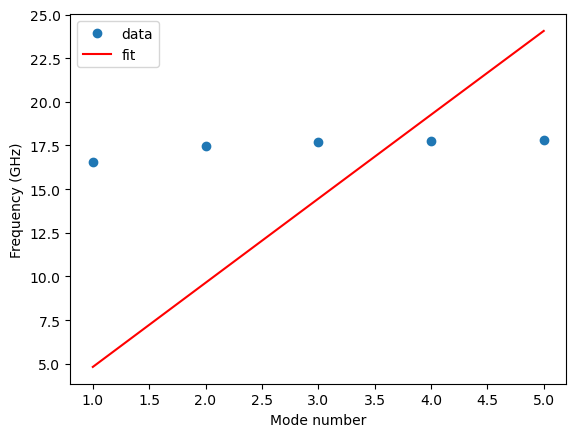

In [47]:
# plot the data and the fit
plt.plot(data[:,0], data[:,1], 'o', label='data')
plt.plot(data[:,0], func(data[:,0], *popt), 'r-', label='fit')
plt.xlabel('Mode number')
plt.ylabel('Frequency (GHz)')
plt.legend()
plt.show()

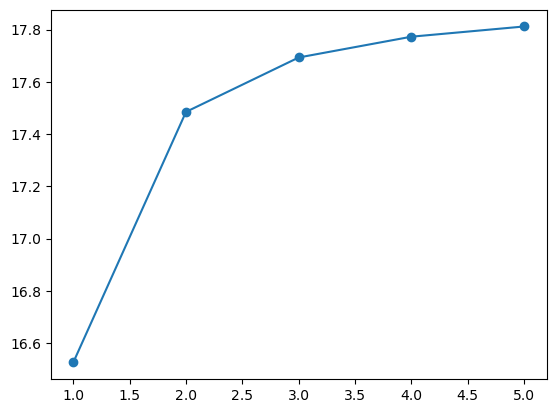

In [30]:
x = np.arange(1,6, 1)
values = np.array([16.5257,17.4850,17.6933,17.7729,17.8120])
plt.plot(x,values,'o-')
plt.show()

In [31]:
N = 76
Cj = junction_capacitance
w0 = plasma_frequency
# fit to a function
def func(x, c0):
    return w0*np.sqrt((1-np.cos(np.pi*x/N))/(c0/2/Cj + 1-np.cos(np.pi*x/N)))


popt, pcov = curve_fit(func, x, values)

In [32]:
popt

array([455.74525108])